In [68]:
import os
import csv

x_labels = []
measurements = {}

for dir in sorted(os.listdir('../default_paper')):
    x_labels.append(int(dir))
    for alg in os.listdir(compound := os.path.join('../default_paper', dir)):
        alg_name = alg.split('.')[0]
        if alg_name not in measurements.keys():
            measurements[alg_name] = []
        with open(os.path.join(compound, alg), 'r') as f:
            r = csv.reader(f)
            measurements[alg_name].append(dict(r))

measurements

{'Simulated Annealing': [{'SingleFlipRelation': '2.276930630646352',
   'KFlipRelation': '2.2760672183115243',
   'KFlipRelation1': '2.2756887953156815',
   'KFlipRelation12': '2.275857649482582',
   'KernighanLinHeuristic': '2.267098808917093'},
  {'SingleFlipRelation': '0.5197244511702536',
   'KFlipRelation': '0.5197244511702536',
   'KFlipRelation1': '0.5197244511702536',
   'KFlipRelation12': '0.5197244511702536',
   'KernighanLinHeuristic': '0.5197244511702536'},
  {'SingleFlipRelation': '0.7601011337284809',
   'KFlipRelation': '0.7601011337284809',
   'KFlipRelation1': '0.7601011337284809',
   'KFlipRelation12': '0.7601011337284809',
   'KernighanLinHeuristic': '0.7601011337284809'},
  {'SingleFlipRelation': '1.1436368891102902',
   'KFlipRelation': '1.1436368891102902',
   'KFlipRelation1': '1.1436368891102902',
   'KFlipRelation12': '1.1436368891102902',
   'KernighanLinHeuristic': '1.1436368891102902'},
  {'SingleFlipRelation': '1.505348234927456',
   'KFlipRelation': '1.505

In [69]:
import matplotlib.pyplot as plt

y_labels_all = []
for rel in measurements[list(measurements.keys())[0]][0].keys():
    y_labels = []
    for alg, records in measurements.items():
        records_rel = []
        for r in records:
            records_rel.append(r[rel])
        y_labels.append((alg, records_rel))
    y_labels_all.append((rel, y_labels))

<Figure size 432x288 with 0 Axes>

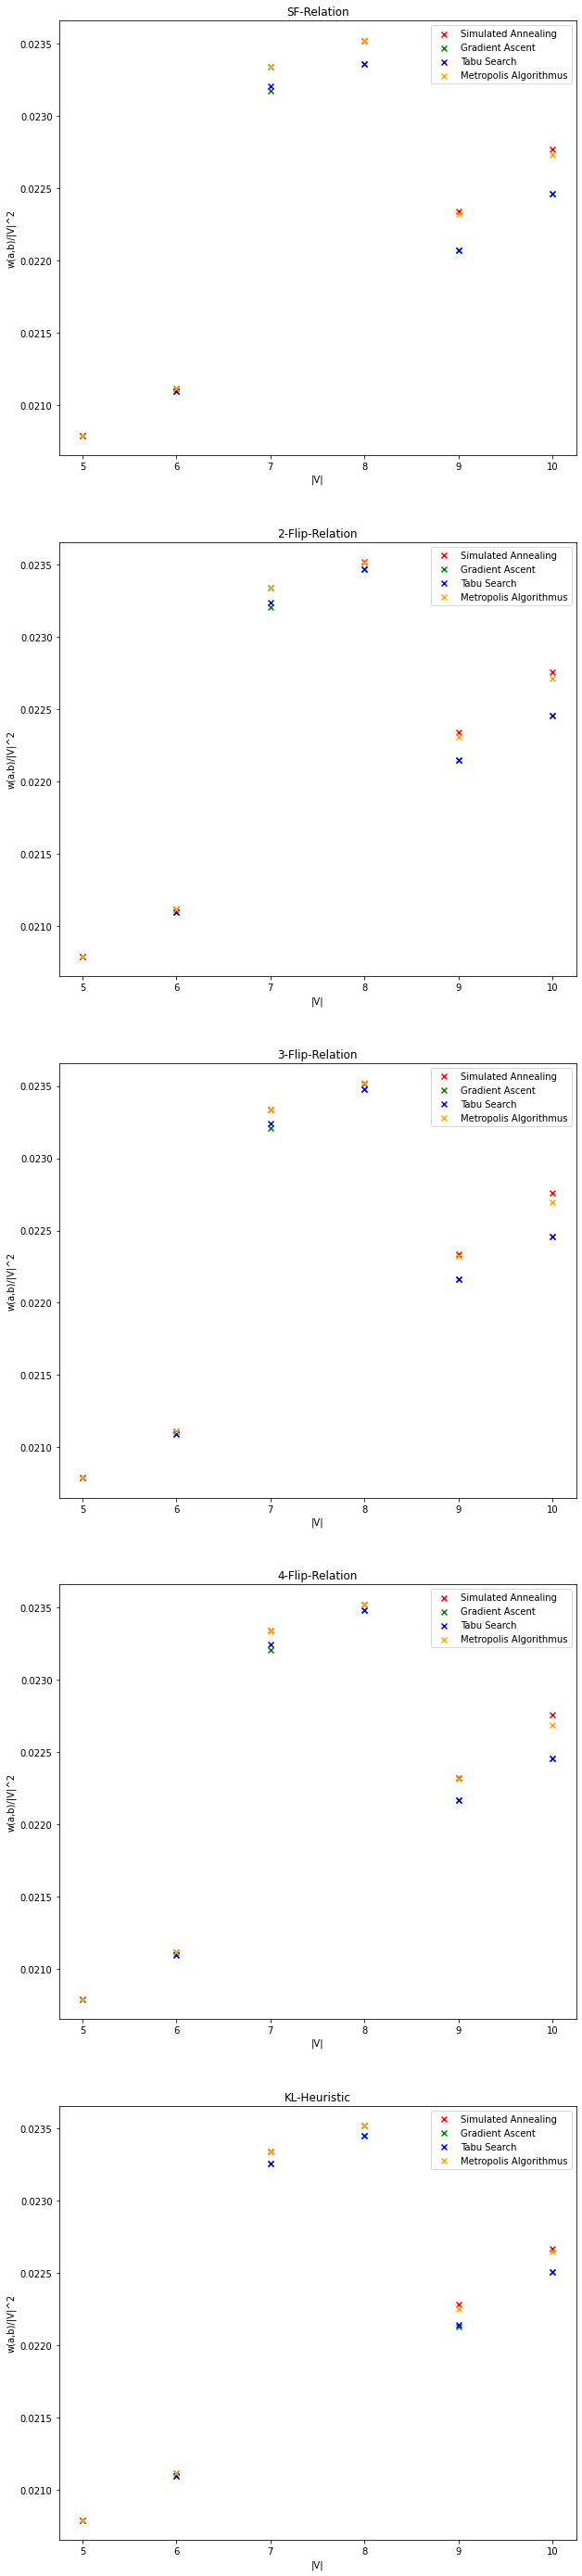

In [81]:
colors = ("red", "green", "blue", "orange", "cyan")
titles = ("SF-Relation", "2-Flip-Relation", "3-Flip-Relation", "4-Flip-Relation", "KL-Heuristic")
plt.tight_layout()
fig, ax = plt.subplots(5, figsize=(10,50))
for (i, y_label), title in zip(enumerate(y_labels_all), titles):
    for el, color in zip(y_label[1], colors):
        data = [float(x) for x in el[1]]
        data_normed = [d/(n**2) for d, n in zip(data, x_labels)]
        ax[i].scatter(x_labels, data_normed, label=el[0], marker='x', color=color)
        ax[i].set_title(title)
        ax[i].legend()
        ax[i].set_ylabel("w(a,b)/|V|^2")
        ax[i].set_xlabel("|V|")
plt.show()